# Introduction

This lab demonstrates how to perform univariate feature selection before running a support vector classifier (SVC) to improve the classification scores. We will use the iris dataset (4 features) and add 36 non-informative features. We will find that our model achieves the best performance when we select around 10% of features.


# Load the Data

We start by loading the iris dataset and adding 36 non-informative features to it.

In [1]:
import numpy as np
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Add non-informative features
rng = np.random.RandomState(0)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36))))

# Create the Pipeline

Next, we create a pipeline consisting of a feature-selection transform, a scaler, and an instance of SVM that we combine together to have a full-blown estimator.

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = Pipeline(
    [
        ('anova', SelectPercentile(f_classif)),
        ('scaler', StandardScaler()),
        ('svc', SVC(random_state=0, gamma='auto'))
    ])

# Plot the Cross-Validation Score

We plot the cross-validation score as a function of percentile of features.

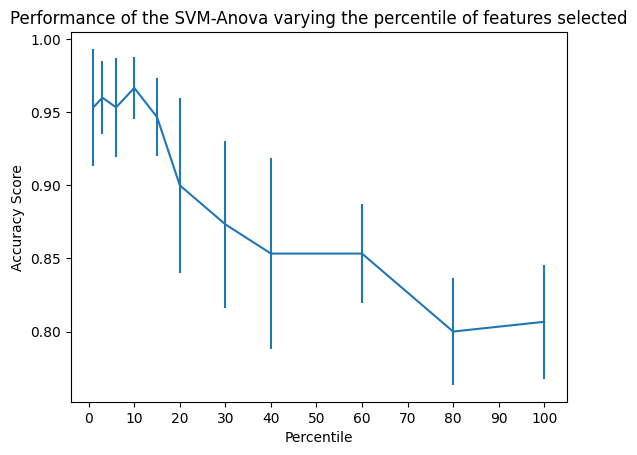

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()

# Summary

In this lab, we learned how to perform univariate feature selection before running a support vector classifier (SVC) to improve the classification scores. We used the iris dataset (4 features) and added 36 non-informative features. We found that our model achieved the best performance when we selected around 10% of features.